## Science Platforms Exercise 1 Solution

This is the solution notebook for the first part of the exercises in Science Platforms.

In [60]:
import SciServer
from SciServer import CasJobs     # Communicate between SciServer Compute and CasJobs
print('Imported SciServer modules')

import pandas                                # data analysis tools
import numpy as np                           # numerical tools
import matplotlib.pyplot as plt
import skimage.io
from datetime import datetime, timedelta     # date and timestamp tools
from pprint import pprint                    # print human-readable output
print('Imported other needed modules')

Imported SciServer modules
Imported other needed modules


In [61]:
# Run the CROSS APPLY query with the distance between the object and its neighbor included
# Also include the distance that the fGetNearbyObjEq function returns.  To get the nearest
# neighbor, you actually SELECT the object with the smallest distance.
# Run the query in Submit mode in CasJobs, just in case it takes longer than a minute.
# Save the results to a table called MyNbrsDist.
myquery = 'SELECT a.id, a.objid as objid1, b.objid as objid2, \n'
myquery += '    a.ra, a.dec, b.distance \n'
myquery += 'INTO MyDB.MyNbrsDist\n'
myquery += 'FROM MyDB.MyObjs a\n'
myquery += 'CROSS APPLY (SELECT TOP 1 objid, distance \n'
myquery += '     FROM dbo.fGetNearbyObjEq( a.ra, a.dec, 1.0 ) \n'
myquery += '      WHERE objid != a.objID ORDER BY distance) b \n'
myjobid = CasJobs.submitJob(sql=myquery, context="DR15")

In [62]:
# This is just a way to give the job enough time to finish. You will get an error if it has not
# finished because the table wont exist yet.
waited = CasJobs.waitForJob(jobId=myjobid)      # waited is a dummy variable; just print wait msg
jobDescription = CasJobs.getJobStatus(myjobid)

     id               objid1               objid2          ra       dec  \
0     1  1237648720693888083  1237648720693887498  180.000338 -0.496883   
1     2  1237648720693887509  1237674649928728803  180.000988 -0.420694   
2     3  1237654669748732845  1237648720693887509  180.001140 -0.420634   
3     4  1237648673430438800  1237648720693887926  180.002399 -0.428579   
4     5  1237648720693887926  1237648720693887519  180.002406 -0.428544   
5     6  1237674649928728804  1237674649928728803  180.002461 -0.414987   
6     7  1237648720693887513  1237648720693887514  180.002649 -0.478290   
7     8  1237648673430438422  1237648720693887513  180.002666 -0.478292   
8     9  1237654669748732471  1237674649928728803  180.002675 -0.415836   
9    10  1237674649928728803  1237674649928728804  180.002690 -0.415836   
10   11  1237648673430438424  1237648720693887514  180.002825 -0.483477   
11   12  1237648720693887514  1237648720693888167  180.002871 -0.483480   
12   13  1237648720693887

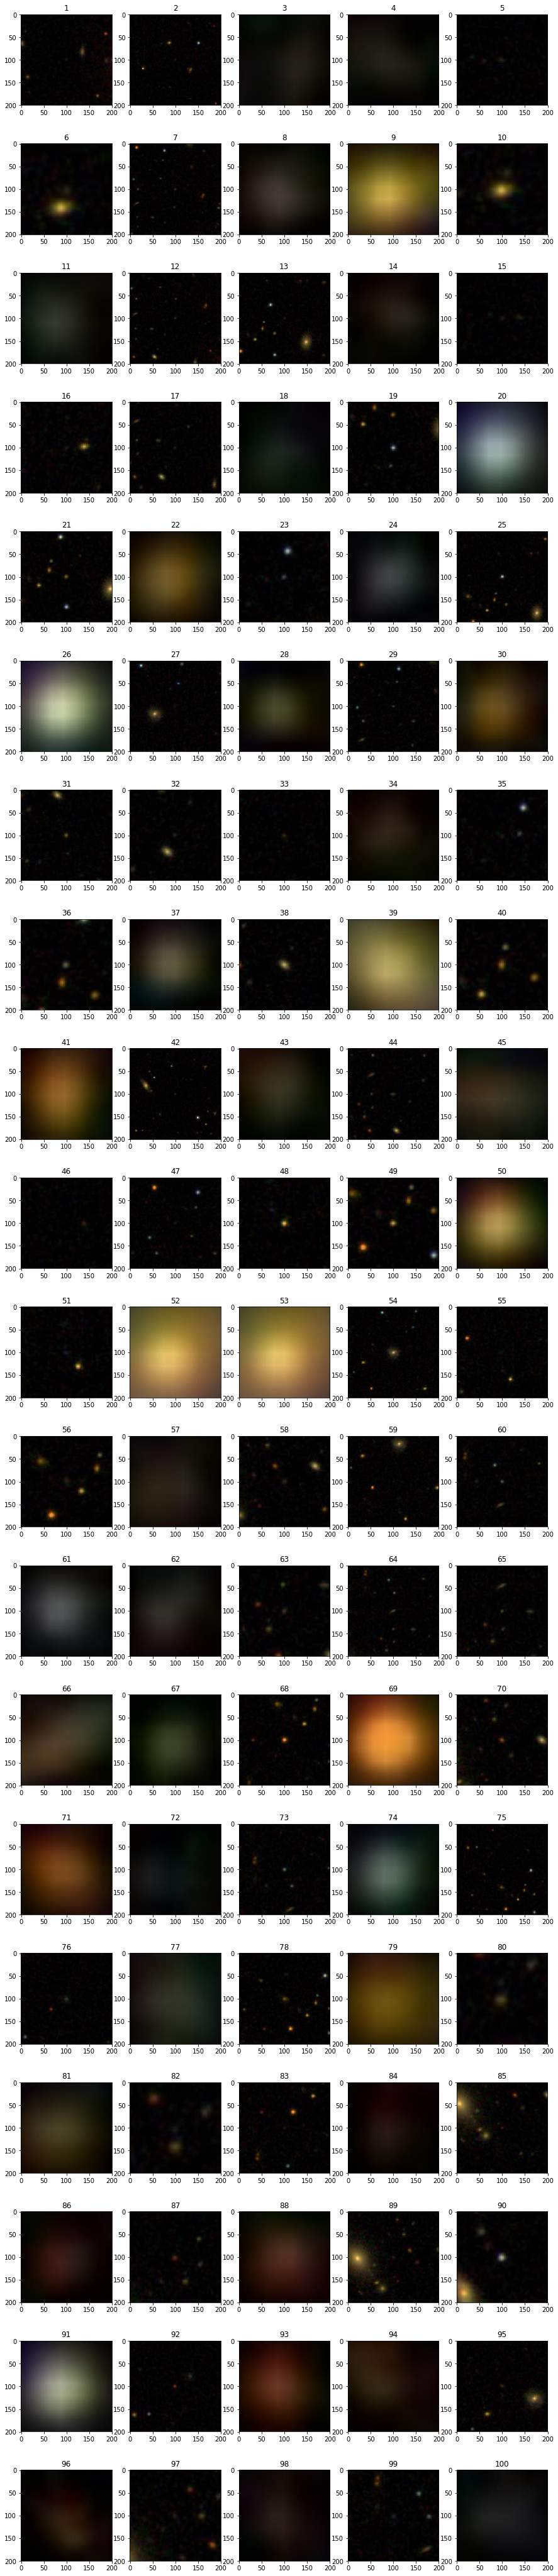

In [65]:
# Now fetch the MyDB table into our result buffer 
myquery = 'SELECT * FROM MyNbrsDist'
result = CasJobs.executeQuery(myquery, 'MyDB')
print(result)

# Set up the parameters for the cutout displays
width=200
height=200
pixelsize=0.396
plt.figure(figsize=(15, 75))
subPlotNum = 1
# Get the number fo rows in the plot if you want to show 5 plots per row
rows = int(len(result)/5)


# We fetch JPEG cutouts from SkyServer for each object in our list
# The size of the cutout is determined from the distance between the object and its neighbor
# The distance returmed by fGetNearbyObjEq is in arcmin, so we multiply it by 60 and use
# twice the distance as the width of the cutout, which is centered on the object's ra,dec.
# Note that 'height' and 'width' give the physical box size of each cutout, and 'scale' is the
# quantity that determines size of the cutout on the sky.
# NOTE: The plots will take a minute or two to show up, for the 100 objs in the data table.

print('Please wait while the cutouts are being genrated ...')
for index,obj in result.iterrows():
    scale=2*60*obj['distance']/pixelsize/width
    # The cutout is obtained with a call to the (DR15) SkyServer ImgCutout web service
    url="http://skyserver.sdss.org/dr15/SkyServerWS/ImgCutout/getjpeg?ra="+str(obj['ra'])
    url+="&dec="+str(obj['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url+="&height="+str(height)
    img=skimage.io.imread(url)
    plt.subplot(rows,5,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)
    plt.title(int(obj['id']))


## Thank you!

Thanks for reviewing this SciServer example notebook. You can use this notebook as a template to develop your own notebooks, but please do so in a copy rather than in the original example notebook.
As you begin to use any of our SciServer modules in your own notebooks, consult the SciServer scripting documentation at http://www.sciserver.org/docs/sciscript-python/SciServer.html (link opens in a new window).

If you have questions, please email the SciServer helpdesk at sciserver-helpdesk@jhu.edu.